<a href="https://colab.research.google.com/github/amanciohdr/meu-primeiro-repositorio/blob/main/dio_unimed_venda_pizza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados de uma pizzaria

##A análise a seguir terá cinco perguntas disparadoras:

##1 - Quais dias e horários são mais cheios?
##2 - Quantas pizzas nós fazemos em horários de pico?
##3 - Quais as pizzas mais e menos vendidas?
##4 - Qual o valor médio de pedido?
##6 - Como estamos utilizando nossa capacidade? Temos 60 cadeiras e 15 mesas.

In [120]:
#IMPORTANDO AS BIBLIOTECAS
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
plt.style.use("classic")

In [2]:
#LENDO O ARQUIVO
df = pd.read_excel("/content/drive/MyDrive/DATASETS/Data Model - Pizza Sales.xlsx")

In [3]:
#VISUALIZANDO UMA AMOSTRA DO ARQUIVO
df.sample(15)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
26856,26857,11825,calabrese_l,1,2015-07-17,13:27:05,20.25,20.25,L,Supreme,"慛duja Salami, Pancetta, Tomatoes, Red Onions, ...",The Calabrese Pizza
26114,26115,11501,peppr_salami_l,1,2015-07-11,18:36:27,20.75,20.75,L,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza
39049,39050,17214,thai_ckn_l,1,2015-10-20,11:56:50,20.75,20.75,L,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza
37000,37001,16334,bbq_ckn_m,1,2015-10-02,13:44:29,16.75,16.75,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
29623,29624,13092,soppressata_m,1,2015-08-07,11:31:35,16.50,16.50,M,Supreme,"Soppressata Salami, Fontina Cheese, Mozzarella...",The Soppressata Pizza
25752,25753,11333,bbq_ckn_m,1,2015-07-08,20:12:29,16.75,16.75,M,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza
46014,46015,20199,pepperoni_l,1,2015-12-09,20:02:37,15.25,15.25,L,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
33699,33700,14876,sicilian_s,1,2015-09-06,14:57:04,12.25,12.25,S,Supreme,"Coarse Sicilian Salami, Tomatoes, Green Olives...",The Sicilian Pizza
27985,27986,12323,four_cheese_l,1,2015-07-25,12:03:35,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
44184,44185,19420,napolitana_m,1,2015-11-27,12:48:13,16.00,16.00,M,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza


Podemos ver que temos 48620 pedidos com 12 atributos

In [4]:
#VERIFICANDO VALORES FALTANTES

df.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [5]:
#VERIFICANDO OS TIPOS DOS DADOS
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

#VERIFICANDO O VALOR MÉDIO DO PEDIDO

In [6]:
#valor médio do pedido
#a coluna total_price já traz o preço unitário da pizza multiplicado pela quantidade de pizzas pedidas

round(df["total_price"].mean(), 2)

16.82

#O VALOR ENCONTRADO É EM MÉDIA $16,82 POR PEDIDO

#VERIFICANDO AS PIZZAS MAIS E MENOS PEDIDAS

In [7]:
#PIZZAS MAIS E MENOS VENDIDAS - FIZ DOIS GRÁFICOS: UM CONSIDERANDO SOMENTE A PIZZA DO PEDIDO E OUTRO CONSIDERANDO A PIZZA E A QUANTIDADE PEDIDA
df["pizza_name"].value_counts()

The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Sicilian Pizza                            1887
The Spicy Italian Pizza                       1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza                

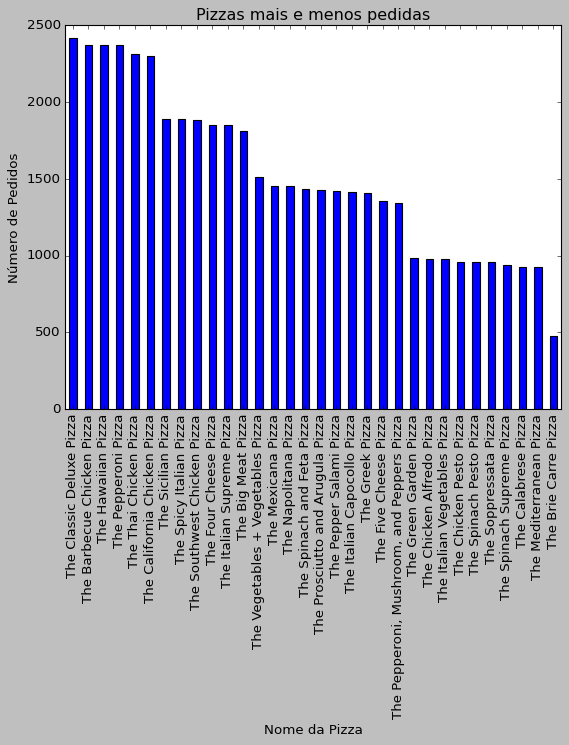

In [121]:
#pizza mais e menos vendida
df["pizza_name"].value_counts().plot.bar(title="Pizzas mais e menos pedidas")
plt.xlabel("Nome da Pizza")
plt.ylabel("Número de Pedidos");

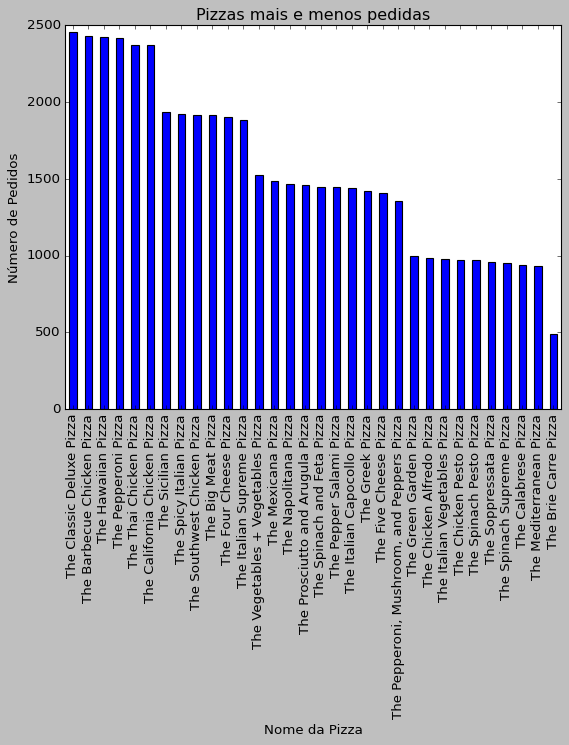

In [122]:
#essa análise não considera o número de pizzas no pedido (se uma ou duas)
#criando uma coluna para melhorar essa análise

df.groupby("pizza_name")["quantity"].sum().sort_values(ascending=False).plot.bar(title="Pizzas mais e menos pedidas")
plt.xlabel("Nome da Pizza")
plt.ylabel("Número de Pedidos");

#AS DUAS ANÁLISES RETORNARAM OS MESMOS RESULTADOS:

##A PIZZA MAIS PEDIDA É A THE CLASSIC DELUXE PIZZA
##A PIZZA MENOS PEDIDA É A THE BRIE CARRE PIZZA

#VERIFICANDO O DIA DA SEMANA MAIS MOVIMENTADO

In [10]:
#criando a coluna de dia da semana, que recebe o nome do dia da semana em inglês
def my_func(x):
  return x.strftime('%A')

df["day_of_the_week"] = df["order_date"].apply(my_func)

In [11]:
#VERIFICANDO UMA AMOSTRA PRA VER SE DEU CERTO
df.sample(10)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_the_week
2859,2860,1265,hawaiian_s,1,2015-01-22,12:59:26,10.50,10.50,S,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday
15635,15636,6854,classic_dlx_m,1,2015-04-25,18:04:05,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Saturday
2301,2302,1026,classic_dlx_l,1,2015-01-17,21:55:05,20.50,20.50,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Saturday
8469,8470,3710,ital_veggie_s,1,2015-03-04,13:48:40,12.75,12.75,S,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza,Wednesday
3118,3119,1380,ital_supr_m,1,2015-01-23,19:51:21,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Friday
12924,12925,5670,calabrese_l,1,2015-04-05,19:14:15,20.25,20.25,L,Supreme,"慛duja Salami, Pancetta, Tomatoes, Red Onions, ...",The Calabrese Pizza,Sunday
46604,46605,20466,spinach_fet_m,1,2015-12-14,12:53:16,16.00,16.00,M,Veggie,"Spinach, Mushrooms, Red Onions, Feta Cheese, G...",The Spinach and Feta Pizza,Monday
48097,48098,21138,thai_ckn_m,1,2015-12-26,21:19:30,16.75,16.75,M,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",The Thai Chicken Pizza,Saturday
26945,26946,11856,ital_supr_l,1,2015-07-17,18:08:42,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,Friday
19171,19172,8426,calabrese_m,1,2015-05-21,18:12:35,16.25,16.25,M,Supreme,"慛duja Salami, Pancetta, Tomatoes, Red Onions, ...",The Calabrese Pizza,Thursday


In [12]:
#AGRUPANDO O NUMERO DE PEDIDOS POR DIA DA SEMANA
df.groupby("day_of_the_week")["quantity"].sum()

day_of_the_week
Friday       8242
Monday       6485
Saturday     7493
Sunday       6035
Thursday     7478
Tuesday      6895
Wednesday    6946
Name: quantity, dtype: int64

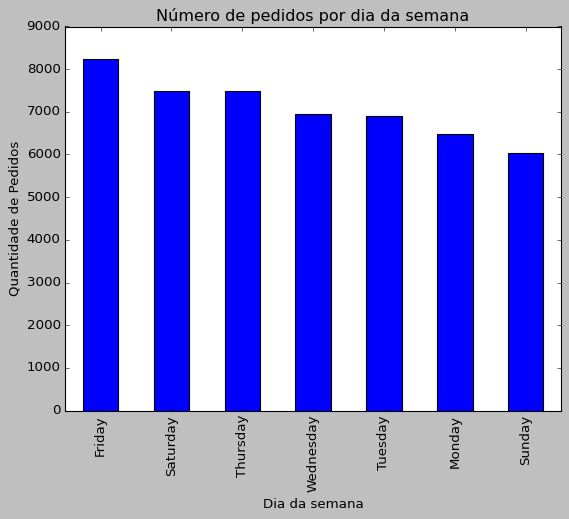

In [139]:
df.groupby("day_of_the_week")["quantity"].sum().sort_values(ascending=False).plot.bar(title="Número de pedidos por dia da semana")
plt.xlabel("Dia da semana")
plt.ylabel("Quantidade de Pedidos");

#SEXTA-FEIRA É DO DIA DA SEMANA COM MAIS PEDIDOS, DEPOIS SÁBADO E QUINTA-FEIRA

#VERIFICANDO OS HORÁRIOS DE PICO

In [143]:
#convertendo order time para datetime - essa feature tava como object, o que impedia de extrair apenas o horário
df["order_time"] = pd.to_datetime(df["order_time"])

In [144]:
df.dtypes

order_details_id              int64
order_id                      int64
pizza_id                     object
quantity                      int64
order_date           datetime64[ns]
order_time           datetime64[ns]
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
day_of_the_week              object
time_hour                     int64
dtype: object

In [140]:
#EXTRAINDO DA COLUNA ORDER_TIME APENAS UMA COLUNA COM AS HORAS
df["time_hour"] = df['order_time'].dt.hour

In [141]:
#vendo se deu certo
df.sample(5)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,day_of_the_week,time_hour
23709,23710,10429,ital_veggie_m,1,2015-06-24,2022-10-29 18:23:53,16.75,16.75,M,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza,Wednesday,18
15838,15839,6959,calabrese_m,1,2015-04-27,2022-10-29 13:55:53,16.25,16.25,M,Supreme,"慛duja Salami, Pancetta, Tomatoes, Red Onions, ...",The Calabrese Pizza,Monday,13
8848,8849,3880,pep_msh_pep_s,1,2015-03-07,2022-10-29 11:38:08,11.00,11.00,S,Classic,"Pepperoni, Mushrooms, Green Peppers","The Pepperoni, Mushroom, and Peppers Pizza",Saturday,11
7900,7901,3473,four_cheese_m,1,2015-02-28,2022-10-29 11:49:43,14.75,14.75,M,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,Saturday,11
23302,23303,10245,mexicana_l,1,2015-06-21,2022-10-29 15:29:49,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,Sunday,15


Text(0, 0.5, 'Npumero de pedidos acumulado')

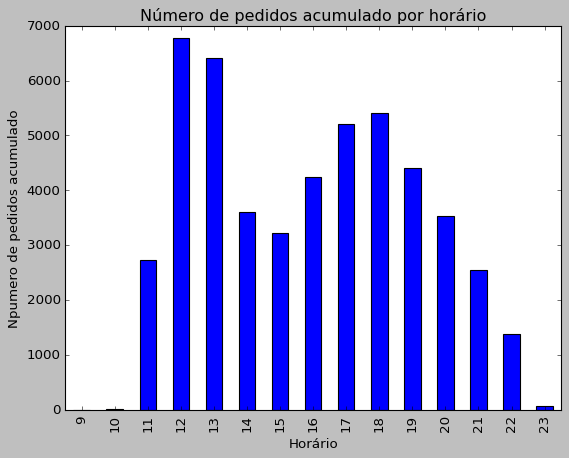

In [142]:
#AGRUPANDO A QUANTIDADE DE PEDIDOS POR HORÁRIO
df.groupby("time_hour")["quantity"].sum().plot.bar(title='Número de pedidos acumulado por horário')
plt.xlabel("Horário")
plt.ylabel("Npumero de pedidos acumulado")

#PODEMOS VER QUE O HORÁRIO MAIS MOVIMENTADO É O DAS 12h00 as 13h59 pela manhã e das 17h00 àS 18H59 pela
#PARA FINS DE VERIFICAR QUANTAS PIZZAS SÃO PRODUZIDAS NO HORÁRIO DE PICO, IREMOS CONSIDERAR O HORÁRIO DE PICO COM SENDO DAS 12h00 ÀS 12h59, QUE RECEBE O NÚMERO 12 NA COLUNA TIME HOUR

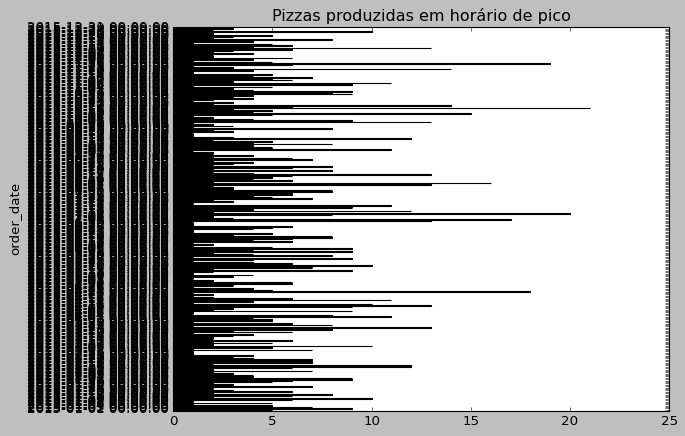

In [146]:
dfhorario_de_pico = df[df['time_hour'] == 12]

dfhorario_de_pico.groupby(dfhorario_de_pico["order_date"])['quantity'].sum().plot.barh(title="Pizzas produzidas em horário de pico")

In [89]:
dfhorario_de_pico.groupby(dfhorario_de_pico["order_date"])['quantity'].sum().mean()

18.980392156862745

In [90]:
dfhorario_de_pico.groupby(dfhorario_de_pico["order_date"])['quantity'].sum().min()

2

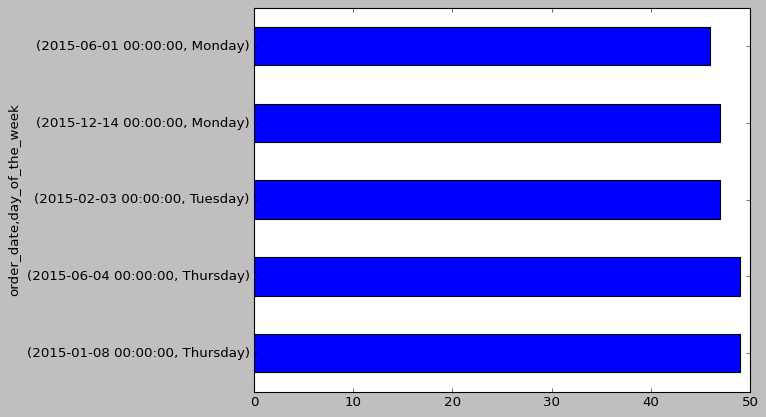

In [126]:
dfhorario_de_pico.groupby([dfhorario_de_pico["order_date"], 'day_of_the_week'])['quantity'].sum().nlargest(5).plot.barh()

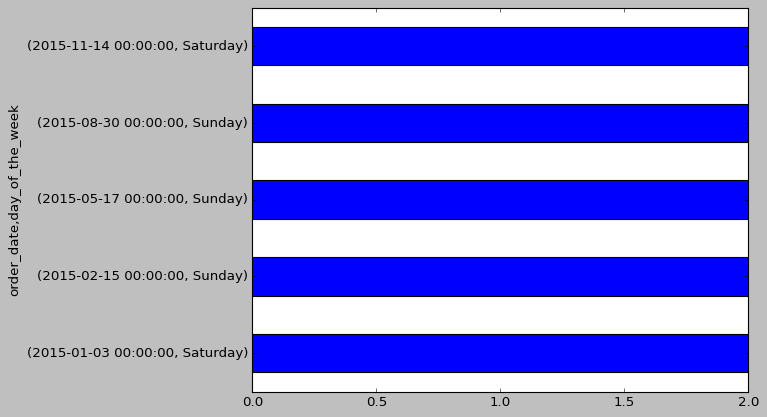

In [127]:
dfhorario_de_pico.groupby([dfhorario_de_pico["order_date"], 'day_of_the_week'])['quantity'].sum().nsmallest(5).plot.barh()

#A MÉDIA DE PEDIDOS NESSE HORÁRIO É DE APROXIMADAMENTE 19 PIZZAS, VARIANDO DE 49 A 2 PIZZAS

#EM RELAÇÃO À CAPACIDADE, FORAM REGISTRADOS VALORES DE 49 PEDIDOS EM HORÁRIO DE PICO. COMO SÃO 15 MESAS, A PIZZARIA ESTÁ OPERANDO MUITO ACIMA DA CAPACIDADE. NÃO SE SABE QUANTAS PESSOAS LEVAM PRA CASA E QUANTAS PESSOAS COMEM NO ESTABELECIMENTO, LIMITANDO A ANÁLISE. 